## Import Packages

In [1]:
from ISLP import load_data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import expit

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

For this exercise, the `Default` dataset is used.

In [2]:
Default_dataset = load_data('Default')

## Binary Logistic Regression

Logistic Regression is an approach to the classification problem, where model predicts the *probablilty* that the response Y belongs to a paticular category, instead of directly predicting the value of the response itself.

We can use linear regression to represent the mentioned probability.

$$
p(X) = \beta_0 + \beta_1 X \tag{1}
$$

As the probability must fall between 0 and 1, the *logistic function* is used. Therefore, equation $(1)$ can be modified as follows.

$$
p(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}} \tag{2}
$$

By a bit of manipulation, we recieve the *log odds*:

$$
\log \left(\frac{p(X)}{1 - p(X)}\right) = \beta_0 + \beta_1 X \tag{3}
$$

To estimate the coefficients $\beta_0$ and $\beta_1$, we use a method called *maximum likelihood*. The idea is to find the estimates for the coefficients such that the predicted probability $\hat{p}(x_i)$ of each predictor corresponds as closely as possible to the observed response. This can be done by choosing $\beta_0$ and $\beta_1$ to maximize the *likelihood function*:

$$
L(\beta_0, \beta_1) = \prod_{i:y_i=1} p(x_i) \prod_{i':y_i'=0} (1 - p(x_{i'})) \tag{4}
$$

For the Binary Logistic Regression, we choose `balance` to be the only predictor and `default` to be the response.

In [3]:
X_binary = Default_dataset['balance'].copy()
y_binary = Default_dataset['default'].copy()

Then we fit the data to the model.

In [4]:
model_binary = LogisticRegression().fit(np.reshape(X_binary.to_numpy(), (-1, 1)), np.reshape(y_binary.to_numpy(), -1))

Print out the value of $\hat{\beta_0}$ and $\hat{\beta_1}$.

In [5]:
print(model_binary.intercept_)
print(model_binary.coef_)

[-10.65132824]
[[0.00549892]]


We can intepret the result above as:
- When the `balance` is 0, the value of log odds is -10.65.
- For each 1 unit increase of `balance`, the value of log odds increases 0.005 unit.

### Gradient Descent for Binary Logistic Regression

In general, we want to choose $\theta$ to minimize a cost function $J(\theta)$. We can consider the *Gradient Descent* algorithm, which starts with some initial $\theta$, then repeatedly changes $\theta$ to make $J(\theta)$ smaller, until it converges to a value of $\theta$ that minimizes $J(\theta)$. The update of $\theta$ is as follows, where $\alpha$ is the *learning rate*:

$$
\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) \tag{5}
$$

For Logistic Regression, instead of minimizing a cost function $J(\theta)$, we want to maximize the likelihood function $L(\theta)$. First, we can rewrite equation $(4)$, with some manipulation, as follows:

$$
L(\theta) = \prod_{i} p\left(x^{(i)}\right)^{y^{(i)}} \left(1 - p\left(x^{(i)}\right)\right)^{1 - y^{(i)}} \tag{6}
$$

Then the log likelihood will be:

$$
\begin{align}
\ell(\theta) &= \log L(\theta) \\
&= \sum_{i} y^{(i)} \log p\left(x^{(i)}\right) + \left(1 - y^{(i)}\right) \log \left(1 - p\left(x^{(i)}\right)\right)
\end{align}

\tag{7}
$$

In this case, we want to maximize our likelihood function, therefore *Gradient Ascent* can be used. Then the update will be:

$$
\theta_j := \theta_j + \alpha \frac{\partial}{\partial \theta_j} \ell(\theta) \tag{8}
$$

After taking derivatives of $\ell(\theta)$, we receive:

$$
\frac{\partial}{\partial \theta_j} \ell(\theta) = (y - p(x)) x_j \tag{9}
$$

This therefore gives us the update rule:

$$
\theta_j := \theta_j + \alpha \left(y^{(i)} - p\left(x^{(i)}\right)\right) x_j^{(i)} \tag{10}
$$

Let's apply the above theory into our current dataset. First, we will set up necessary elements. In this case, we will set the learning rate to be 0.001.

In [6]:
coef_binary_grad_desc = np.zeros((2, 1))

learning_rate = 0.001

X_binary_grad_desc = np.reshape(Default_dataset['balance'].copy().to_numpy(), (-1, 1))
y_binary_grad_desc = np.reshape(((Default_dataset['default'].copy().to_numpy()) == 'Yes').astype(int), (-1, 1))

X_binary_grad_desc = np.insert(X_binary_grad_desc, 0, 1, axis=1)

n = len(X_binary_grad_desc)

Then, we run the algorithm with 10 epochs.

In [7]:
epochs = 10

for epoch in range(epochs):
    for i in range(n):
        sigmoid = expit(np.dot(X_binary_grad_desc[i], coef_binary_grad_desc))
        update_factor = np.reshape(learning_rate * (y_binary_grad_desc[i].item() - sigmoid) * X_binary_grad_desc[i], (-1, 1))
        coef_binary_grad_desc = coef_binary_grad_desc + update_factor

Print out the coefficients.

In [8]:
print(coef_binary_grad_desc)

[[-4.01189301]
 [-0.19058982]]


## Multiple Logistic Regression

For Multiple Logistic Regression, we are using every features of the dataset. With binary feature `student`, we will use a dummy variable which has value of 1 for `'Yes'` and 0 for `'No'`.

In [9]:
X_multiple = Default_dataset.copy().drop(axis=1, columns='default')
X_multiple['student'] = (X_multiple['student'] == 'Yes').astype(int)
y_multiple = Default_dataset['default'].copy()

Then we fit the data to the model.

In [10]:
model_multiple = LogisticRegression().fit(X_multiple, np.reshape(y_multiple.to_numpy(), -1))

Print out the coefficients.

In [11]:
print(model_multiple.intercept_)
print(model_multiple.coef_)

[-10.9018116]
[[-6.12564499e-01  5.73060606e-03  3.96189943e-06]]


### Gradient Descent for Multiple Logistic Regression

Applying what we did above for every feature of the dataset. The learning rate is still 0.001

In [12]:
learning_rate = 0.001

X_multiple_grad_desc = Default_dataset.copy().drop(axis=1, columns='default')
X_multiple_grad_desc['student'] = (X_multiple['student'] == 'Yes').astype(int)

y_multiple_grad_desc = np.reshape(((Default_dataset['default'].copy().to_numpy()) == 'Yes').astype(int), (-1, 1))

X_multiple_grad_desc = np.insert(X_multiple_grad_desc, 0, 1, axis=1)

_, col_num = X_multiple_grad_desc.shape
coef_multiple_grad_desc = np.zeros((col_num, 1))

n = len(X_multiple_grad_desc)

And we run 10 epochs.

In [13]:
epochs = 10

for epoch in range(epochs):
    for i in range(n):
        sigmoid = expit(np.dot(X_multiple_grad_desc[i], coef_multiple_grad_desc))
        update_factor = np.reshape(learning_rate * (y_multiple_grad_desc[i].item() - sigmoid) * X_multiple_grad_desc[i], (-1, 1))
        coef_multiple_grad_desc = coef_multiple_grad_desc + update_factor

Print out the coefficients.

In [14]:
print(coef_multiple_grad_desc)

[[ -1.2785    ]
 [  0.        ]
 [273.89810784]
 [-23.77276171]]


## Train/Test Splitting

We now perform train/test splitting with 80/20 ratio on the raw dataset. For consistency, the `random_state` is set to 42.

In [15]:
X_raw = Default_dataset.copy().drop(axis=1, columns='default')
X_raw['student'] = (X_raw['student'] == 'Yes').astype(int)
y_raw = Default_dataset['default'].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X_raw, y_raw,
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=y_raw
)

For comparison purposes, the target class distribution is illustrated below.

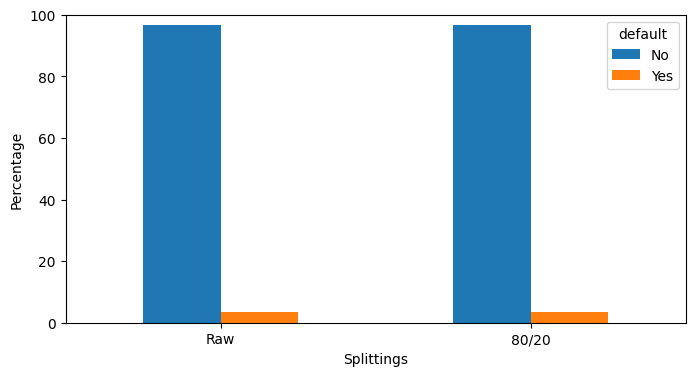

In [16]:
distribution = {}

raw_pct = y_raw.value_counts(normalize=True) * 100
test_pct = y_test.value_counts(normalize=True) * 100

distribution['Raw'] = raw_pct
distribution['80/20'] = test_pct

dist_df = pd.DataFrame(distribution).T

dist_df.plot(kind='bar', figsize=(8, 4), legend=True, ylim=(0, 100), xlabel='Splittings', ylabel='Percentage')
plt.xticks(rotation=0)
plt.show()

As can be seen from the plot, `No` values accounts for over 90% appearance in the dataset.

Then, we fit the train data to the model.

In [17]:
model_proc = LogisticRegression().fit(X_train, y_train)

And print out the coefficients.

In [18]:
print(model_proc.intercept_)
print(model_proc.coef_)

[-10.66719106]
[[-6.06191571e-01  5.71274780e-03 -1.71262652e-06]]


Comparing these coefficients with those of the raw model, all of the coefficients are highly similar. 

Finally, the model performance is checked using `classification_report` and `confusion_matrix`.

              precision    recall  f1-score   support

          No       0.98      1.00      0.99      1933
         Yes       0.70      0.31      0.43        67

    accuracy                           0.97      2000
   macro avg       0.84      0.65      0.71      2000
weighted avg       0.97      0.97      0.97      2000



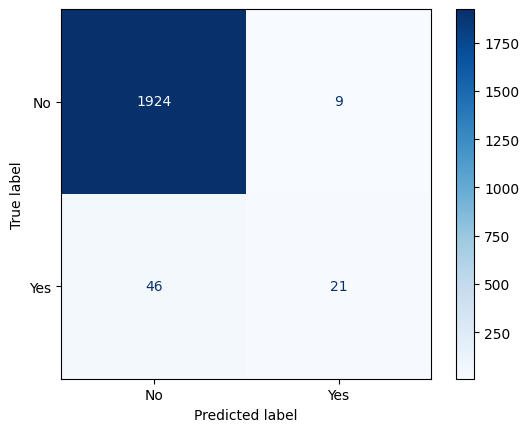

In [19]:
y_pred = model_proc.predict(X_test)
target_name = ['No', 'Yes']

report = classification_report(
    y_test, y_pred, target_names=target_name
)
print(report)

conf_matrix = confusion_matrix(
    y_test, y_pred, labels=target_name
)
conf_mat_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=target_name)
conf_mat_disp.plot(cmap='Blues', values_format='d')

From the result above, we can draw some comments:
- For `No`, the model performs exceptionally well, with precision, recall and f1-score are all 0.98 and above. This might come from the large proportion of appearance of `No` class in the training set.
- In contrast, the model does not have good performance on predicting `Yes`. As this can result from small percentage of appearance in the training set.
- The model often mispredict `Yes` into `No`, as can be seen from the confusion matrix, with the mispredict doubles the correct ones.
- Overall, it is quite obvious that the model performs well on predicting `No` class, while being struggle to correctly predict `Yes` class in many situations.